# Laboratory 2

In this second laboratory you will implement (from scratch) and train two simple classifiers: the softmax classifier and, for extra credit, you can extend the project by also implementing the hinge loss.

Don't worry, starting from the next laboratory we'll be using a popular machine learning library, but for now it is very important to understand the anatomy of these simple models.
 
Another important aspect that we'll be discussing today is how to properly evaluate a classifier.




In [ ]:
import os
import sys
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

In [ ]:
!git clone https://github.com/dianalauraborza/cvdl_lab2_solved.git

SyntaxError: ignored

## Warm-up

Let's start by implementing the softmax function. This function takes as input an array of *N* arbitrary numbers and normalizes the array such that the output is a probability distribution.


\begin{equation}
softmax(x)_i = \frac{e^{x_i}}{\sum_{j = 0}^{j = N} e^{x_j}}
\end{equation}

In the file *utils.py* write the implementation of the softmax function.

**Short discussion about softmax numerical stability.** You can also check this [post](https://ogunlao.github.io/2020/04/26/you_dont_really_know_softmax.html)

In [ ]:
# validate softmax

# let's check that you obtained the same values 
# as the softmax implementation in tensorflow
arr = np.asarray([2, 4, 10, 100, 2.0])
assert (np.allclose(tf.nn.softmax(arr).numpy(), softmax(arr)))
arr = np.asarray([0.0, 0, 0, 1, 0])
assert (np.allclose(tf.nn.softmax(arr).numpy(), softmax(arr)))
arr = np.asarray([-750.0, 23, 9, 10, 230])
assert (np.allclose(tf.nn.softmax(arr).numpy(), softmax(arr)))
arr = np.ones((4, ))
assert (np.allclose(tf.nn.softmax(arr).numpy(), softmax(arr)))
arr = np.zeros((4, ))

*Softmax temperature* is a concept that we'll be using later in this course. 
The *softmax temperature* is a hyper-parameter (positive number) which scales the input of the softmax function to modify the output probabilities.


\begin{equation}
softmax(x, T)_i = \frac{e^{x_i/T}}{\sum_{j = 0}^{j = N} e^{x_j/T}}
\end{equation}

Now modify your implementation of the softmax function such that it also takes as input the softmax temperature (a positive floating point number). If this parameter is not specified, it should default to 1.


Now let's visualise what is the effect of the softmax temperature. 
Given the input vector *x = [100, 2, -150, 75, 99, 3]* , plot the original vector and the softmax with temperatures $ T \in \{0.25, 0.75, 1, 1.5, 2, 5, 10, 20, 30\} $.
 
You can use a bar plot for this. The title for each plot should be the value of the softmax temperature. Also, make sure that for all the plots the range of the *y* axis is set to (0, 1).
 

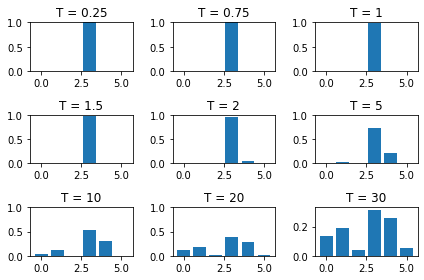

In [ ]:
# your code here
import matplotlib.pyplot as plt
x = np.asarray([20, 30, -15, 45, 39, -10])
T = [0.25, 0.75, 1, 1.5, 2, 5, 10, 20, 30]

for idx in range(0, len(T)):
  # TODO your code here
  # plot the result of applying the softmax function 
  # with different temperatures on the array x
  
  # end TODO your code here
  pass



Analyse the plots and answer the following questions:
* What happens when we use a large number for the softmax temperature?
* What happens when we use a small number (i.e. less than 1) for the softmax temperature?
* In the context of image classification, the predicted class is determined by taking the *argmax* of the softmax function. Does the softmax temperature change in any way this prediction?

## Image classification
 
Image classification refers to the problem of automatically assigning a label (a class) to an image $I_i$. As classification is a supervised learning problem, each image is assigned a ground truth label $y_i \in \{1, 2, ..., C\}$.
 
 
A linear classifier uses a function $score_f$ to map an input image $I_i \in R^{H\times W\times 3}$ into a vector of C class scores  $\hat y_i \in R^C$:
 
\begin{equation}
score_f(I_i) = X_i \cdot W + b
\end{equation}
 
The learnable parameters of the classifier are the weight matrix $W$ and the bias vector $b$.
 
During the training process, the values of the weight matrix and the bias vector are learned by minimizing a loss function (that penalises the discrepancy between the predicted and the ground truth label).
 
In your implementation, use the bias trick to include the bias term in the weight matrix.
 
## Implementation
 
 
### Softmax classification
 
We'll follow an object oriented approach to solve this problem.
All the code related to the softmax classifier will be implemented in the class *SoftmaxClassifier* (defined in the script _softmax.py_).
 
The class comprises the following methods:
 
| Method                               | Description |
| ----------- | ----------- |
| initialize()      | This function randomly initializes the weights of the linear classifier.    |
| fit(X_train, y_train, **kwargs)      | This function will learn the weights of the model based on the training data samples (X_train) and their corresponding ground truth (y_train)       |
|  predict(X)                | This function will return the classifier's prediction (the predicted class) for the data passed as parameter.        |
|  predict_proba(X)                | This function will return the classifier's predictions for the data passed as parameters.        |
|  save(path)   | This function will dump the weights of the classifier in the path specified as parameter.        |
|  load(load)   | This function will load the classifier's weights from the path specified as parameter      |
 
Feel free to add any additional helper methods if needed.
 
#### Initialization and persistence 
* the constructor of this class takes as input the flattened size of the input image and the number of output classes, sets the corresponding class variables and calls the _init()_ method.
* fill in the _initialize()_ method. You figure out the shape of the weight matrix based on the input shape and the number of classes. Initialize the weight matrix with small random variables.
__Use the bias trick__!
* fill in the _save_ and _load_ functions. In these functions you should just dump and restore, respectively, the weight matrix to/from the specified file.
 
#### Inference - the _predict_ and _predict\_proba_ methods
 
The inference is quite simple. You just need to compute the dot product between the input and the weight matrix.
You will implement two inference methods:
* _predict_ - this will just return the predicted class label. So you just need to compute the dot product and take the argmax of the result.
* _predict\_proba_ - this will return the class probabilities. So after computing the dot product, you also need to apply the softmax function on the result to normalize it to a probability distribution.
 
#### Training  - the _fit_ method
 
The training process is implemented in the function _fit_.
The softmax loss function is defined as:
 
\begin{equation}
L_i = - log(softmax(X_i)_{y_i}).
\end{equation}
 
So, we are basically just taking the negative of the logarithm of the predicted probability for the ground truth class.
In the case of the softmax classifier, $\hat y_i$ is always a value in the interval [0, 1] (we use the softmax function to normalize the logits into a probability distribution). 
 
When the probability of the ground truth class is small (i.e. close to 0), the loss will be very high (theoretically, infinite) [log(0) = -inf]. On the other hand, when the probability of the correct class will be high (i.e. close to 1), then the loss will be close to 0 [log(1) = 0].
 
For training the classifier, the loss function must be minimized and we'll achieve this using gradient descent.
 
 
Using the gradient descent algorithm, the weights of the classifier update by taking small steps in the opposite direction of the gradient of the loss function in the current point:
 
\begin{equation}
W += -\lambda * dW 
\end{equation}
, where W is the weight matrix and dW is the gradient with respect to the weight matrix. $\lambda$ is the learning rate (a hyper-parameter of the model).
 
The first step is to determine the analytical gradient of the loss function with respect to parameters of the classifier. It turns out that the gradient has an elegant and simple form:
 
\begin{equation}
\frac{\partial L_i}{\partial W} = (s_i - \delta_{ij}) \cdot s_j.
\end{equation}
 
In the equation above $\delta_{ij}$ is the Kronecker delta function (i.e. the function is 1 if _i_ and _j_ are equal, and 0 otherwise).
 
For a detailed derivation of the gradient for the softmax loss you can check out this [post](https://eli.thegreenplace.net/2016/the-softmax-function-and-its-derivative/).
 
Remember from the lecture that, in order to avoid overfitting, a regularization term is added to the loss function. 
 
You will implement the $L_2$ regularization, in which you also add the  sum of squares of all of the feature weights to the loss.
 
\begin{equation}
L_t = \frac{1}{N} \sum_i -log(softmax(X_i)_{y_i}) + \rho \cdot \sum_r \sum_c W_{(r, c)}^2.
\end{equation}
 
$\rho$ is the regularization strength, another hyper-parameter of the model.
 
The gradient with respect to the regularization term is straight forward.
You will use mini-batch gradient descent, in which you will perform the parameter update after "seeing" a batch of samples.

## Dataset

We'll be using CIFAR-10 dataset. 
The dataset comprises 60000 colour images with a resolution of $32 \times 32$, separated into 10 classes, with 6000 images per class. It is already split into train-test subsets, with 50000 training images and 10000 test images.

You can download the data from this [link](https://www.cs.toronto.edu/~kriz/cifar-10-python.tar.gz).

In [ ]:
!wget https://www.cs.toronto.edu/~kriz/cifar-10-python.tar.gz
!tar -xvf cifar-10-python.tar.gz

--2021-10-10 17:43:35--  https://www.cs.toronto.edu/~kriz/cifar-10-python.tar.gz
Resolving www.cs.toronto.edu (www.cs.toronto.edu)... 128.100.3.30
Connecting to www.cs.toronto.edu (www.cs.toronto.edu)|128.100.3.30|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 170498071 (163M) [application/x-gzip]
Saving to: ‘cifar-10-python.tar.gz’

cifar-10-python.tar 100%[===================>] 162.60M  97.4MB/s    in 1.7s    

2021-10-10 17:43:37 (97.4 MB/s) - ‘cifar-10-python.tar.gz’ saved [170498071/170498071]

cifar-10-batches-py/
cifar-10-batches-py/data_batch_4
cifar-10-batches-py/readme.html
cifar-10-batches-py/test_batch
cifar-10-batches-py/data_batch_3
cifar-10-batches-py/batches.meta
cifar-10-batches-py/data_batch_2
cifar-10-batches-py/data_batch_5
cifar-10-batches-py/data_batch_1


In the script *cifar10.py* you will complete the function *load_cifar10*, which load the data from the archive you just downloaded.

The images of this dataset are are stored in a numpy array, one image per row, in the following order:

"_The first 1024 entries contain the red channel values, the next 1024 the green, and the final 1024 the blue. The image is stored in row-major order, so that the first 32 entries of the array are the red channel values of the first row of the image._"

Your task here is just to manipulate this array, such that each image has the shape (32, 32, 3) and uses RGB ordering.

Now let's visualize some of the images from the CIFAR-10 dataset.

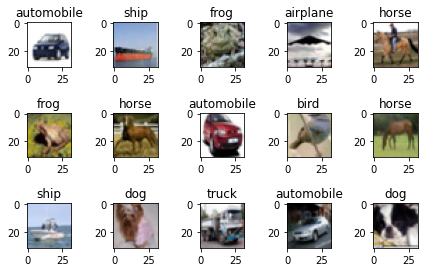

In [ ]:
  cifar_root_dir = 'cifar-10-batches-py'
  _, _, X_test, y_test = load_ciaf10(cifar_root_dir)
  indices = np.random.choice(len(X_test), 15)

  display_images, display_labels = X_test[indices], y_test[indices]
  for idx, (img, label) in enumerate(zip(display_images, display_labels)):
      plt.subplot(3, 5, idx + 1)
      plt.imshow(img)
      plt.title(LABELS[label])
      plt.tight_layout()
  plt.show()

## Putting it all together

By now you have implemented all the blocks needed to train a softmax classifier.

Let's train some classifiers using different hyper-parameters.

We'll be using a random search to tune the hyper-parameters of the classifier (the learning rate $\lambda$ and the regularization strength $\rho$)

## Classifier evaluation
 
After the training process, you want to evaluate the model on the test set, such that you can get an idea on how well your model will perform on unseen data.
Ideally the classes in the test set should be balanced (i.e. you should have the same number of samples for each one of the classes).
 
### Confusion matrix and classification metrics
 
The confusion matrix can be considered the foundation stone for evaluating a classifier. As the name states, it's a simple way of visualising whether/how the model is confusing the classes. 
 
Each row of the confusion matrix represents the instances of the ground truth class, while each column represents the instances of the predicted class.
 
<img src="https://2.bp.blogspot.com/-EvSXDotTOwc/XMfeOGZ-CVI/AAAAAAAAEiE/oePFfvhfOQM11dgRn9FkPxlegCXbgOF4QCLcBGAs/s1600/confusionMatrxiUpdated.jpg"/>
 
Based on the confusion matrix, you can compute different classification metrics:
* *accuracy*: this is simply the ratio between the correctly classified samples (either positive or negative) and the total number of samples;
* _precisi**on**_ : this metric measures the ability of the classifier to capture **only** relevant samples;
* _rec**all**_ : this metric measures the ability of the classifier to spot **all** positive samples.
 
As you may have noticed, it is not possible to maximize precision and recall at the same time, as one comes at the cost of another. 
Therefore, the $F_1$ score -- the harmonic mean between precision and recall -- was defined to combine these two metrics into a single numerical value.
 
\begin{equation}
F_1 = 2 \cdot \frac{precision \cdot recall}{precision + recall}
\end{equation}
 
In the file *metrics.py* you should fill in the code for computing the accuracy, precision, recall and f1-score of your classifier.
 
One challenge when implementing these metrics is that you are not allowed to use any repetitive loops (only numpy vectorization).
 

## Additional questions
 
You want to measure the air quality in your city, so you bought an air quality sensor. 
 
However, you notice that your sensor always returns an air quality index equal to 75, no matter where you place it.
 
* What can you say about the precision of the measurements that you perform?
What about the accuracy of these measurements?


Compute the metrics on the best classifier you obtained so far.

In [ ]:
Your answer = 'my answer' #@param {type:"string"}

You determined that the sensor is broken, so you change it with a brand new one. Now everything seems to be ok.
 
To measure the air quality around your house, you place the sensor in different areas: near your favourite scented candle, under your gas central heating exhaust pipe, on your balcony oriented towards the forest/ocean/mountains :) etc.
 
* What can you say about the precision of the measurements that you perform? What about the accuracy of these measurements?


In [ ]:
Your answer = '' #@param {type:"string"}

## Conclusions

In [ ]:
%%html
<marquee style='width: 100%; color: red;'><b>Yay! You're done!</b></marquee>

Please take two minutes of your time and fill in this [form](https://docs.google.com/forms/d/1sjQZKtJ0dbzeZbdihyAd2O04btAx3hbs7A37eXVDcuI) related to this lab. 

Thanks for your valuable feedback and for helping me "test" the labs!

<img src="https://i.imgflip.com/2uxn79.jpg" style="width:300px;"/>
